In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants

In [210]:
csv_dir = "ble_central/output"
static_millisec = 100
anomaly_acc_threshold = 0.8
top_acc_threshold = 4

# Methods

In [224]:
def adjust_dataframe_by_static_acc(static_acc, df):
    df_adjusted = df.copy()
    df_adjusted["x_acc_adjusted"] = df.apply(lambda row: row["x_acc"] - static_acc[0], axis = 1)
    df_adjusted["y_acc_adjusted"] = df.apply(lambda row: row["y_acc"] - static_acc[1], axis = 1)
    df_adjusted["z_acc_adjusted"] = df.apply(lambda row: row["z_acc"] - static_acc[2], axis = 1)
    return df_adjusted

def calculate_and_plot_acc(path, file_num):
    for i in range(1,1+file_num):
        csv_path = f"{csv_dir}/dataArray_{path}_{i}.csv"
        df = pd.read_csv(csv_path, header=None, names=['x_acc', 'y_acc', 'z_acc', 'millisec'])

        static_acc = df[df.millisec < df.millisec.min() + static_millisec].mean().to_numpy()[:3]
        df_adjusted = adjust_dataframe_by_static_acc(static_acc, df)

        anomaly_point = df_adjusted[(df_adjusted.x_acc_adjusted.abs() > anomaly_acc_threshold) | (df_adjusted.y_acc_adjusted.abs() > anomaly_acc_threshold) | (df_adjusted.z_acc_adjusted.abs() > anomaly_acc_threshold)].millisec.min()
        top_acc_point = df_adjusted[(df_adjusted.x_acc_adjusted.abs() >= top_acc_threshold) | (df_adjusted.y_acc_adjusted.abs() >= top_acc_threshold) | (df_adjusted.z_acc_adjusted.abs() >= top_acc_threshold)].millisec.min()

        print(anomaly_point, top_acc_point, top_acc_point - anomaly_point)

        ax = df_adjusted[['x_acc_adjusted', 'y_acc_adjusted', 'z_acc_adjusted', 'millisec']].plot(x='millisec')
        ax.axvline(anomaly_point, color='grey', linestyle='--')
        ax.axvline(top_acc_point, color='grey', linestyle='--')
        
def calculate_start_millisec(df):
    static_acc = df[df.millisec < df.millisec.min() + static_millisec].mean().to_numpy()[:3]
    df_adjusted = adjust_dataframe_by_static_acc(static_acc, df)
    
    return df_adjusted[(df_adjusted.x_acc_adjusted.abs() > anomaly_acc_threshold) | (df_adjusted.y_acc_adjusted.abs() > anomaly_acc_threshold) | (df_adjusted.z_acc_adjusted.abs() > anomaly_acc_threshold)].millisec.min()
    
def calculate_end_punch_millisec(df):
    return df[df.x_acc == df.x_acc.min()].millisec.min()

def calculate_end_kick_millisec(df):
    return df[df.z_acc == df.z_acc.min()].millisec.min()

def calculate_and_plot(path, file_num, is_kick=False):
    for i in range(1,1+file_num):
        csv_path = f"{csv_dir}/dataArray_{path}_{i}.csv"
        df = pd.read_csv(csv_path, header=None, names=['x_acc', 'y_acc', 'z_acc', 'millisec'])

        start = calculate_start_millisec(df)
        
        if is_kick:
            end = calculate_end_kick_millisec(df)
        else:
            end = calculate_end_punch_millisec(df)

        print(start, end, end - start)

        ax = df[['x_acc', 'y_acc', 'z_acc', 'millisec']].plot(x='millisec')
        ax.axvline(start, color='grey', linestyle='--')
        ax.axvline(end, color='grey', linestyle='--')


# Analysis

Measure the time from punch start to x axis acceleration local minimum 

## Punch

60721 60830 109
80708 80818 110
118478 118588 110
134628 134722 94


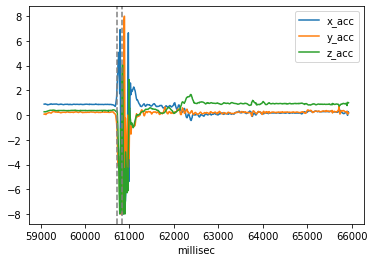

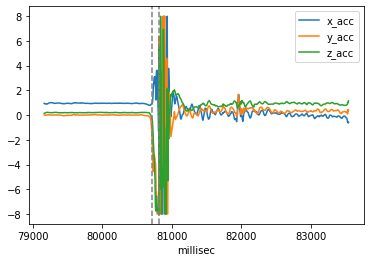

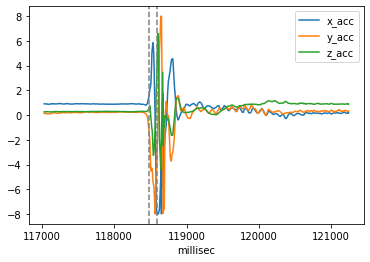

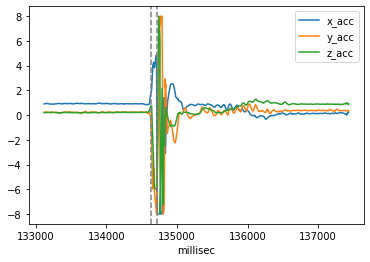

In [211]:
calculate_and_plot("jab", 4)

158303 158488 185
174731 174856 125
197657 197823 166
210255 210398 143


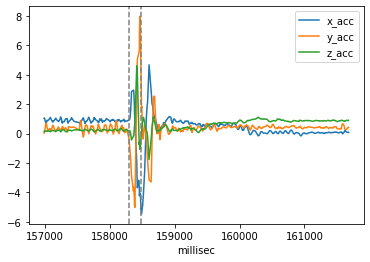

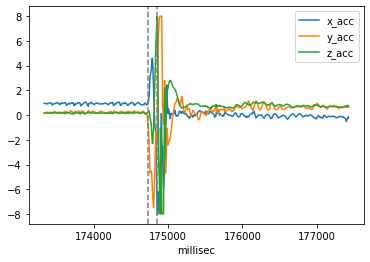

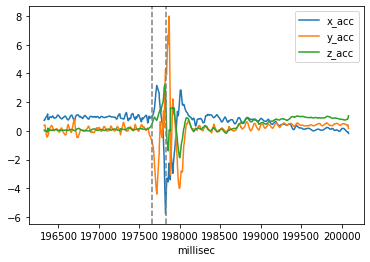

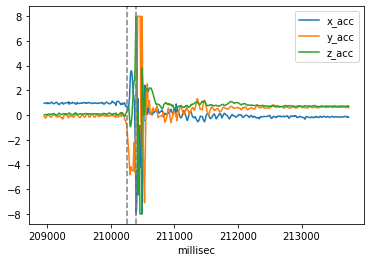

In [212]:
calculate_and_plot("jabp", 4)

329026 329238 212
344017 344208 191
358015 358192 177


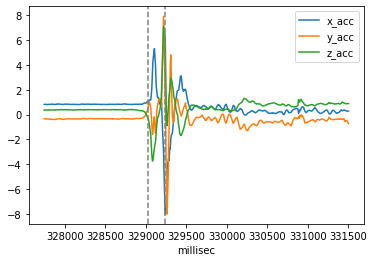

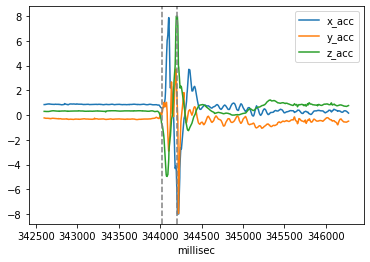

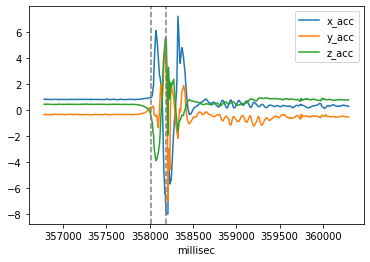

In [213]:
calculate_and_plot("st", 3)

237683 237935 252
251514 251811 297
266961 267230 269


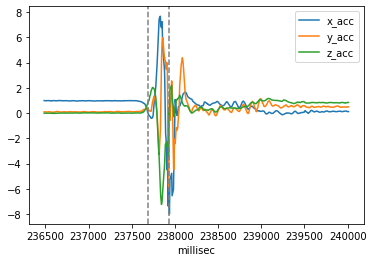

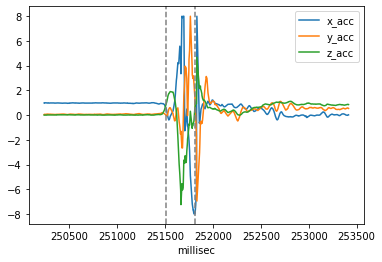

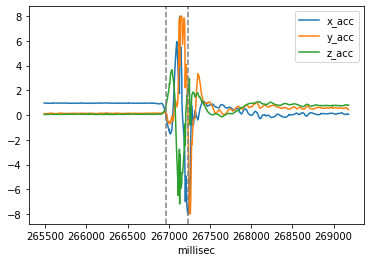

In [214]:
calculate_and_plot("hook", 3)

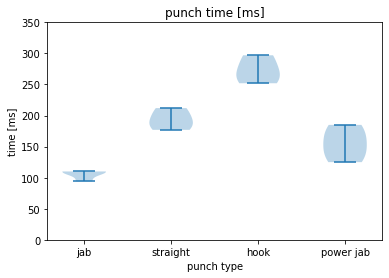

In [234]:
jab = [109, 110, 110, 94]
pjab = [185,125, 166, 143]
st = [212, 191, 177]
hook = [252, 297, 269]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.violinplot([jab, st, hook, pjab])
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['jab', 'straight', 'hook', 'power jab'])
ax.set_xlabel('punch type')
ax.set_ylabel('time [ms]')
ax.set_ylim(0, 350)
ax.set_title('punch time [ms]')

plt.savefig("/Users/ryotanomura/Downloads/punch_speed.png", format="png", dpi=300, facecolor="white", edgecolor="white")

## Kick

72448 72656 208
90770 90975 205
110786 111010 224


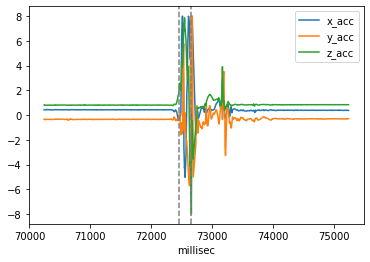

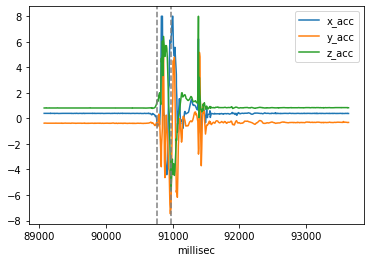

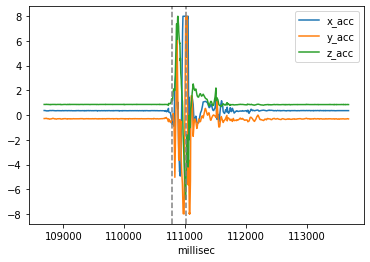

In [225]:
calculate_and_plot("lk", 3, is_kick=True)

127076 127337 261
145204 145483 279
157794 158054 260


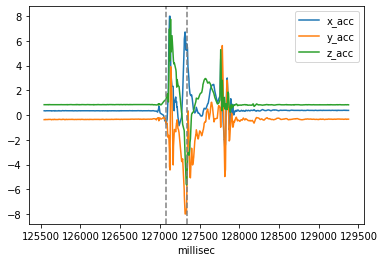

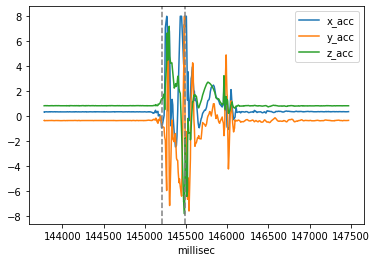

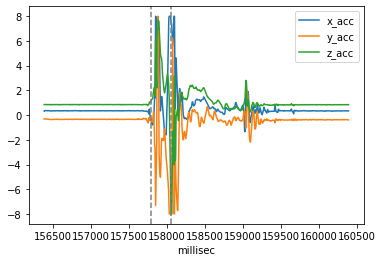

In [226]:
calculate_and_plot("mk", 3, is_kick=True)

170638 170955 317
187680 188002 322
203206 203506 300


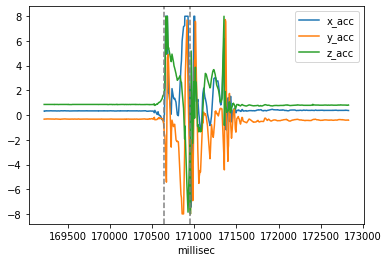

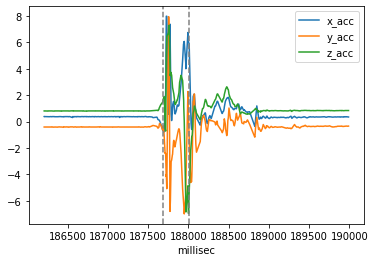

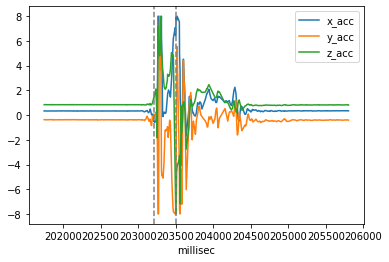

In [227]:
calculate_and_plot("hk", 3, is_kick=True)

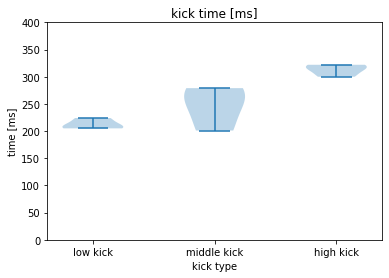

In [235]:
lk = [208, 205, 224]
mk = [201, 279, 260]
hk = [317, 322, 300]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.violinplot([lk, mk, hk])
ax.set_xticks([1, 2, 3])
ax.set_xticklabels(['low kick', 'middle kick', 'high kick'])
ax.set_xlabel('kick type')
ax.set_ylabel('time [ms]')
ax.set_ylim(0, 400)
ax.set_title('kick time [ms]')

plt.savefig("/Users/ryotanomura/Downloads/kick_speed.png", format="png", dpi=300, facecolor="white", edgecolor="white")

# Analysis (221212)

## Jab

143464 143507 43
159298 159356 58
179670 179742 72


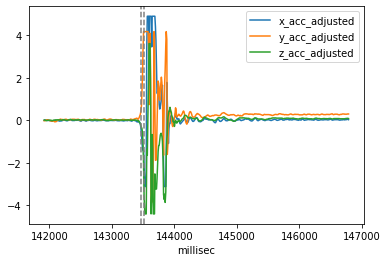

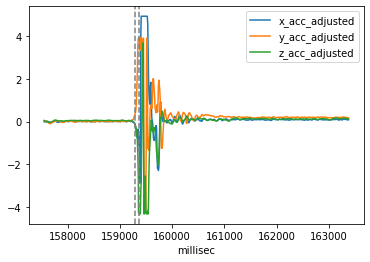

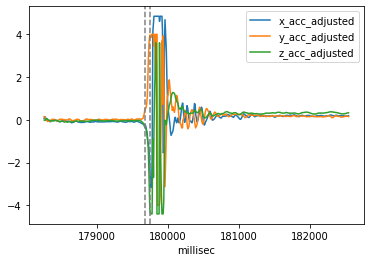

In [176]:
calculate_and_plot_acc("jab", 3)

## jab power

151282 151424 142
169522 169571 49
200440 200561 121


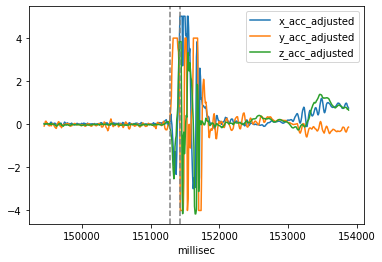

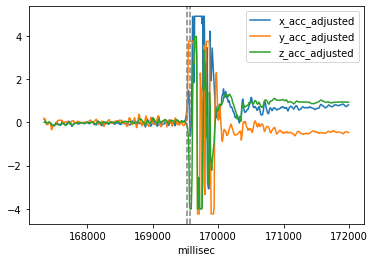

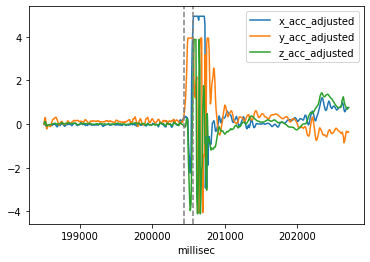

In [175]:
calculate_and_plot_acc("jab_power", 3)

## left hook

37344 37501 157
74362 74535 173
114150 114245 95


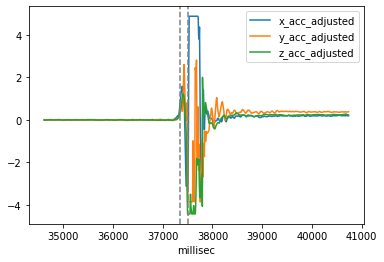

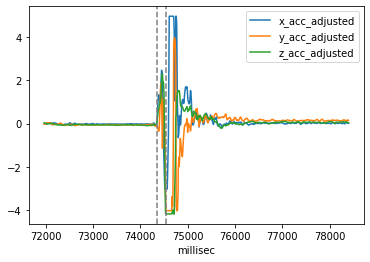

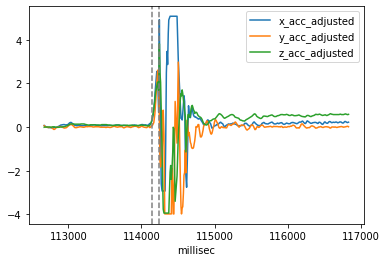

In [177]:
calculate_and_plot_acc("l_hook", 3)

## straight

250524 250579 55
268615 268677 62
331565 331719 154


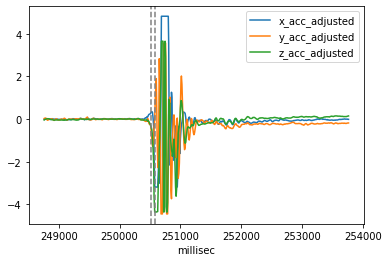

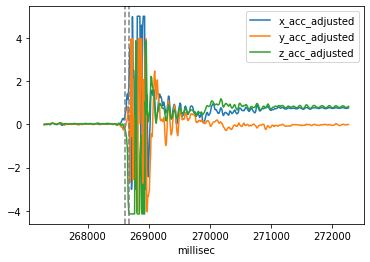

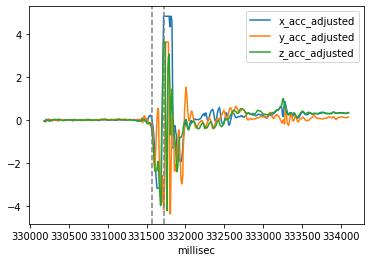

In [178]:
calculate_and_plot_acc("straight", 3)

## low kick

436421 436508 87
475551 475638 87
491659 491757 98


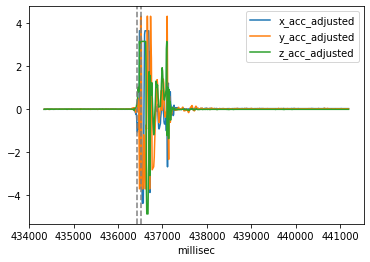

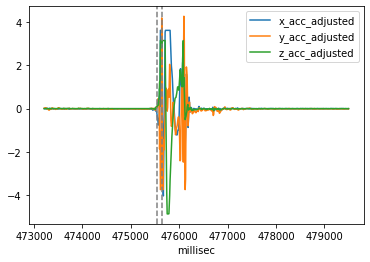

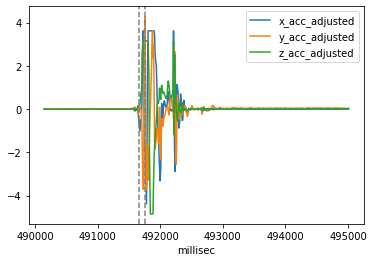

In [179]:
calculate_and_plot_acc("low_kick", 3)

## middle kick

527242 527501 259
545617 545695 78
560324 560412 88


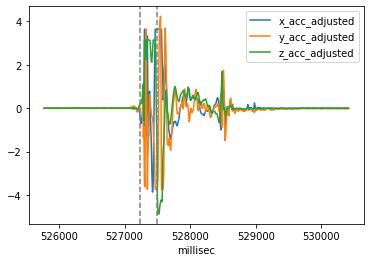

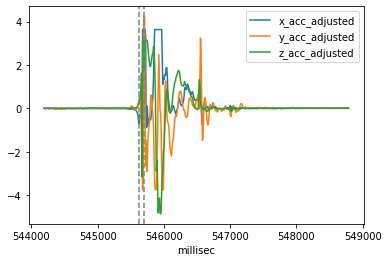

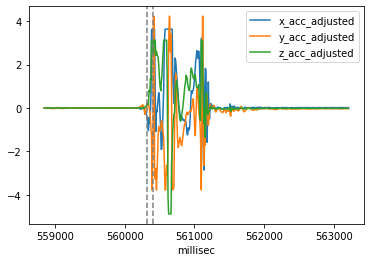

In [180]:
calculate_and_plot_acc("mid_kick", 3)

## high kick

582186 582281 95
613684 613783 99
650106 650467 361


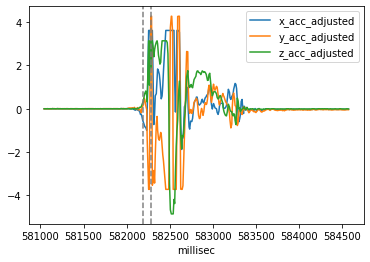

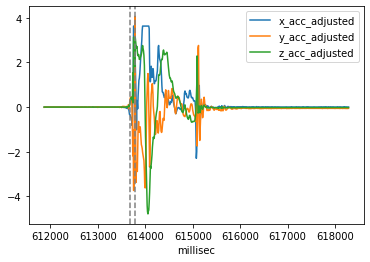

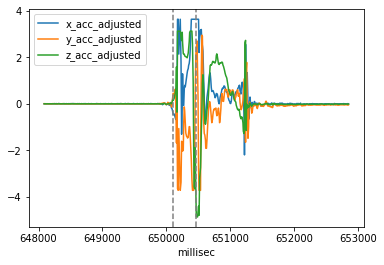

In [181]:
calculate_and_plot_acc("high_kick", 3)

# Pre analysis

## Jab

In [12]:
df = pd.read_csv(f"{csv_dir}/dataArray_punch_1.csv", header=None, names=['x_acc', 'y_acc', 'z_acc', 'millisec'])

In [67]:
vel_list = []
prev_vel = [0, 0, 0]
static_acc = df[df.millisec < df.millisec.min() + static_millisec].mean().to_numpy()[:3]

for index, row in df.iterrows():
    if index == 0:
        prev_row = row
        continue
    
    elapsed_millisec = row[3] - prev_row[3]
    
    acc = row[:3].to_numpy()
    prev_acc = prev_row[:3].to_numpy()

    fixed_acc = (acc + prev_acc - static_acc * 2) / 2
    vel = prev_vel + fixed_acc * elapsed_millisec
    
    vel_list.append(vel)
    
    prev_vel = vel
    prev_row = row

<AxesSubplot:xlabel='millisec'>

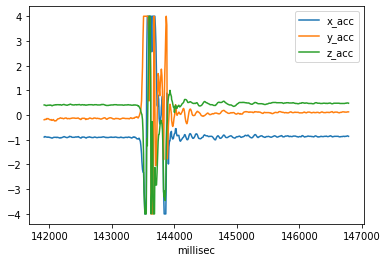

In [15]:
df.plot(x='millisec')

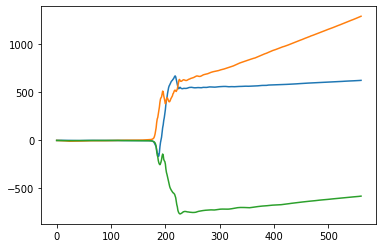

In [69]:
plt.plot(np.array(vel_list))

<AxesSubplot:xlabel='millisec'>

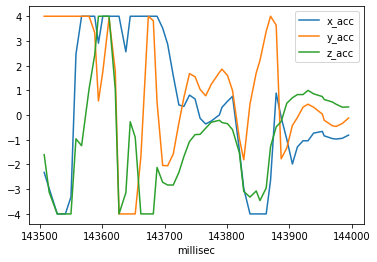

In [72]:
df[(df.millisec > 143500) & (df.millisec < 144000)].plot(x='millisec')

## Slow movement

In [73]:
df = pd.read_csv(f"{csv_dir}/dataArray_slow.csv", header=None, names=['x_acc', 'y_acc', 'z_acc', 'millisec'])

In [86]:
vel_list = []
prev_vel = [0, 0, 0]
static_acc = df[df.millisec < df.millisec.min() + static_millisec].mean().to_numpy()[:3]

for index, row in df.iterrows():
    if index == 0:
        prev_row = row
        continue
    
    elapsed_millisec = row[3] - prev_row[3]
    
    acc = row[:3].to_numpy()
    prev_acc = prev_row[:3].to_numpy()

    fixed_acc = (acc + prev_acc - static_acc * 2) / 2
    vel = prev_vel + fixed_acc * elapsed_millisec / 1000
    
    vel_list.append(vel)
    
    prev_vel = vel
    prev_row = row

<AxesSubplot:xlabel='millisec'>

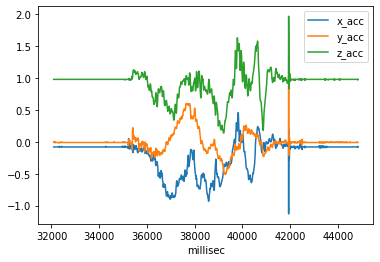

In [87]:
df.plot(x='millisec')

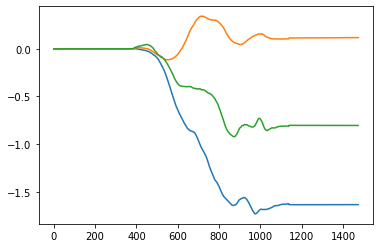

In [88]:
plt.plot(np.array(vel_list))